In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')


In [5]:
from sklearn.datasets import fetch_openml
# import pandas as pd

# Load Boston dataset from OpenML
boston = fetch_openml(name='boston', version=1, as_frame=True)

# Features and target
df = boston.frame
df.head() 


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  MEDV     506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB


In [8]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [11]:
df.shape

(506, 14)

<Axes: >

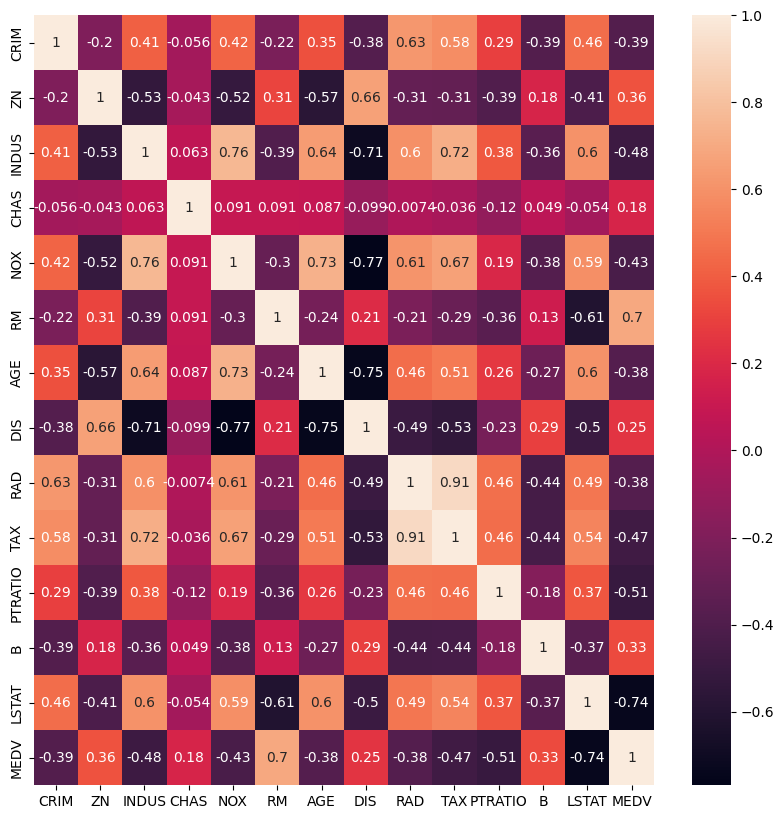

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [24]:
df.astype(int)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,18,2,0,0,6,65,4,1,296,15,396,4,24
1,0,0,7,0,0,6,78,4,2,242,17,396,9,21
2,0,0,7,0,0,7,61,4,2,242,17,392,4,34
3,0,0,2,0,0,6,45,6,3,222,18,394,2,33
4,0,0,2,0,0,7,54,6,3,222,18,396,5,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0,0,11,0,0,6,69,2,1,273,21,391,9,22
502,0,0,11,0,0,6,76,2,1,273,21,396,9,20
503,0,0,11,0,0,6,91,2,1,273,21,396,5,23
504,0,0,11,0,0,6,89,2,1,273,21,393,6,22


In [25]:
X = df.drop('MEDV', axis=1)  # All columns except target
y = df['MEDV']               # Target variable


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [27]:
from sklearn.linear_model import LinearRegression

# Initialize the model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [28]:
# Predict on test data
y_pred = lr_model.predict(X_test)

# Check first 5 predictions
print(y_pred[:5])


TypeError: can't multiply sequence by non-int of type 'float'